In [1]:
import pandas as pds
import sklearn as skl
import seaborn as sns
import numpy as num

In [2]:
planetas = pds.read_csv("cumulative.csv")
planetas.replace('',num.nan,inplace = True)
planetas.dropna(inplace = True)

In [3]:
planetas

,ID,kID,kName,kResult,Not Transit-Like Flag,Stellar Eclipse Flag,Centroid Offset Flag,Ephemeris Match Indicates Contamination Flag,Orbital Period (days),Transit Epoch,Transit Duration (hours),Right Ascension,KIC Declination,Kepler-band
0,1,10797460,K00752.01,CONFIRMED,0,0,0,0,9.488036,170.538750,2.95750,291.93423,48.141651,15347.0
1,2,10797460,K00752.02,CONFIRMED,0,0,0,0,54.418383,162.513840,4.50700,291.93423,48.141651,15347.0
2,3,10811496,K00753.01,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,1.78220,297.00482,48.134129,15436.0
3,4,10848459,K00754.01,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,2.40641,285.53461,48.285210,15597.0
4,5,10854555,K00755.01,CONFIRMED,0,0,0,0,2.525592,171.595550,1.65450,288.75488,48.226200,15509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9556,9560,10031643,K07984.01,FALSE POSITIVE,0,0,0,1,8.589871,132.016100,4.80600,298.74921,46.973351,14478.0
9557,9561,10090151,K07985.01,FALSE POSITIVE,0,1,1,0,0.527699,131.705093,3.22210,297.18875,47.093819,14082.0
9558,9562,10128825,K07986.01,CANDIDATE,0,0,0,0,1.739849,133.001270,3.11400,286.50937,47.163219,14757.0
9559,9563,10147276,K07987.01,FALSE POSITIVE,0,0,1,0,0.681402,132.181750,0.86500,294.16489,47.176281,15385.0


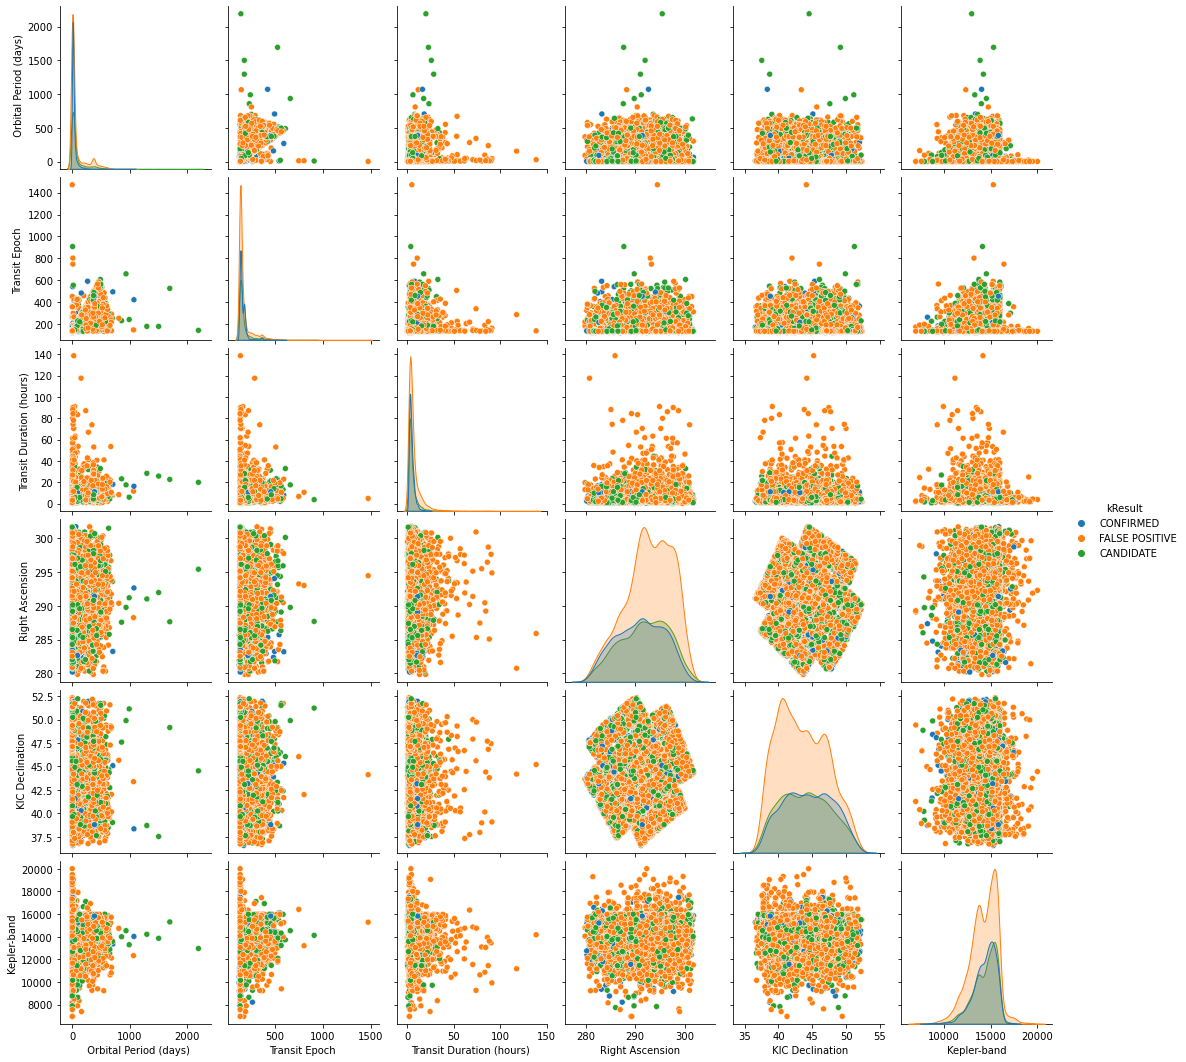

In [4]:
sns.pairplot(planetas, vars = planetas.columns[8:14],hue = 'kResult')

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
yPlanetas = planetas['kResult'].copy()
xPlanetas = planetas.drop(['kResult','kName','kID','Not Transit-Like Flag','Stellar Eclipse Flag','Centroid Offset Flag','Ephemeris Match Indicates Contamination Flag'],axis = 1)
xTreino, xTeste, yTreino, yTeste = train_test_split(xPlanetas, yPlanetas, test_size=0.80, random_state=3)

In [62]:
modeloLinear = svm.SVC(kernel = 'linear')
modeloPoly = svm.SVC(kernel = 'poly')
modeloRBF = svm.SVC(kernel = 'rbf')
modeloSigmoid = svm.SVC(kernel = 'sigmoid')

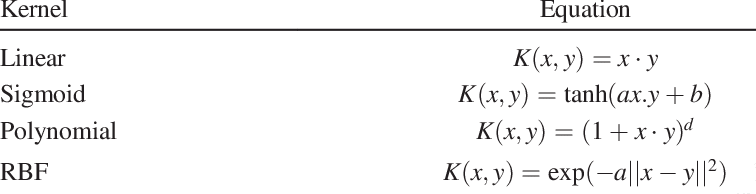

In [63]:
modeloLinear.fit(xTreino,yTreino)
modeloPoly.fit(xTreino,yTreino)
modeloRBF.fit(xTreino,yTreino)
modeloSigmoid.fit(xTreino,yTreino)

SVC(kernel='sigmoid')

In [64]:
modeloLinear.score(xTeste,yTeste)

0.6286610878661087

In [65]:
modeloPoly.score(xTeste,yTeste)

0.609571129707113

In [66]:
modeloRBF.score(xTeste,yTeste)

0.6110094142259415

In [67]:
modeloSigmoid.score(xTeste,yTeste)

0.5010460251046025